# Black Friday Sales Prediction
### Analytics Vidya Hackathon

## Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

## Data Collection

In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train_data["User_ID"].unique

<bound method Series.unique of 0         1000001
1         1000001
2         1000001
3         1000001
4         1000002
           ...   
550063    1006033
550064    1006035
550065    1006036
550066    1006038
550067    1006039
Name: User_ID, Length: 550068, dtype: int64>

In [5]:
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


## Statistical View

In [6]:
train_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
train_data.shape

(550068, 12)

In [9]:
print(train_data.dtypes)

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object


In [10]:
print(test_data.dtypes)

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object


## 1. Handaling Missing Values - Train Data

In [11]:
train_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

## Null Values in Heatmap

<AxesSubplot:>

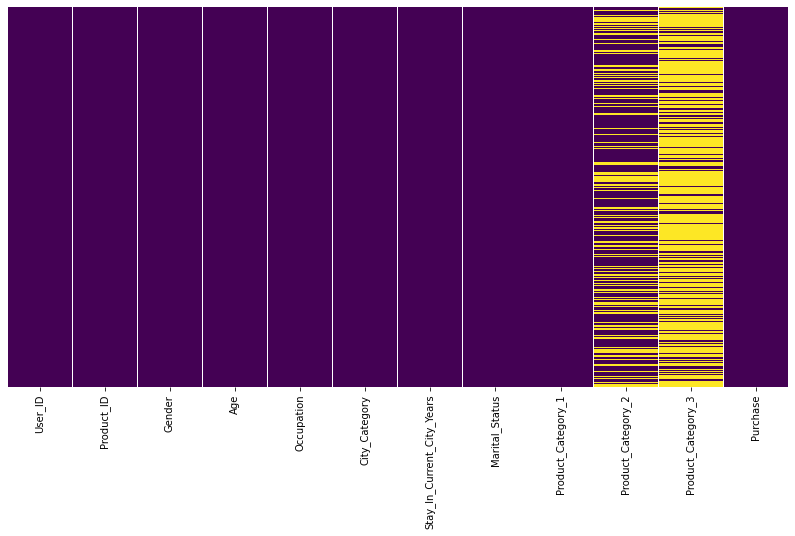

In [12]:
plt.figure(figsize=(14, 7))
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

<AxesSubplot:>

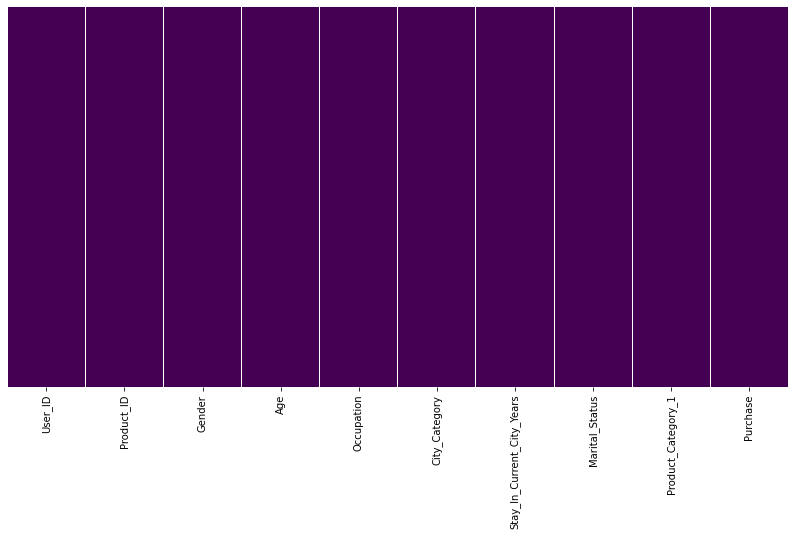

In [13]:
# Remove columns Product_Category_2 and Product_Category_3
train_data = train_data.drop(columns="Product_Category_2")
train_data = train_data.drop(columns="Product_Category_3")
plt.figure(figsize=(14, 7))
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

## 2. Handaling Missing Values - Test Data

In [14]:
test_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

<AxesSubplot:>

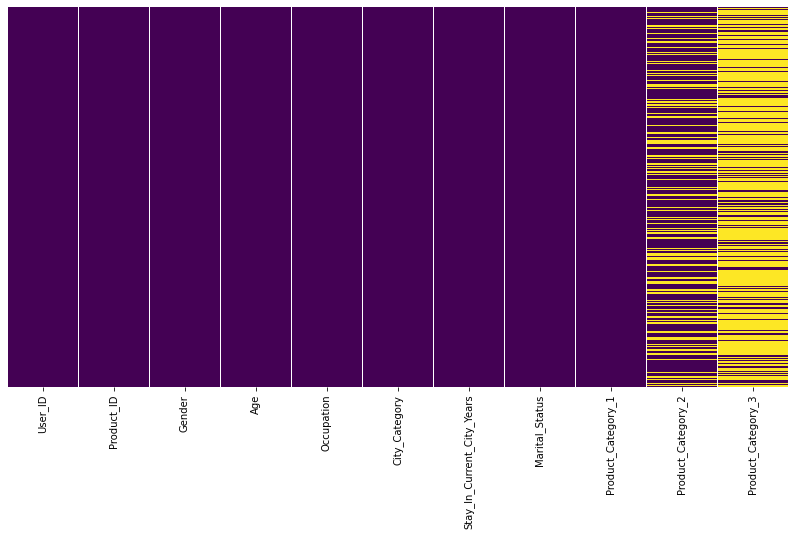

In [15]:
plt.figure(figsize=(14, 7))
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

<AxesSubplot:>

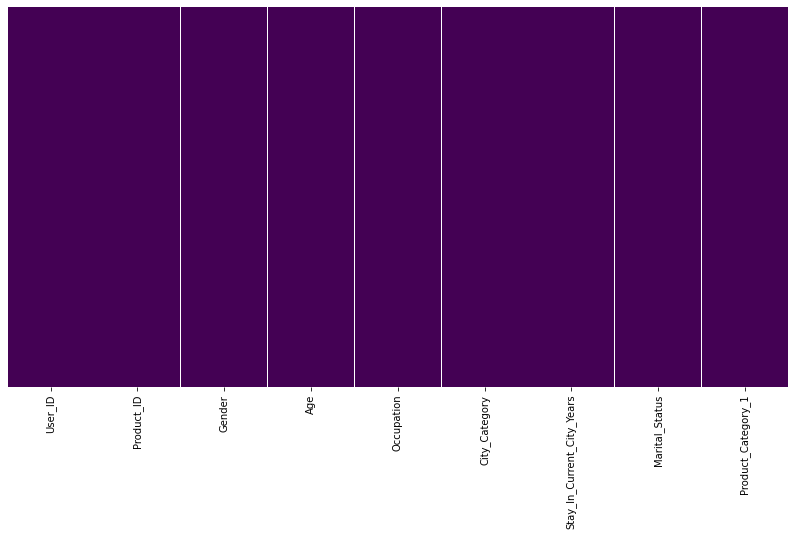

In [16]:
# Remove columns Product_Category_2 and Product_Category_3
test_data = test_data.drop(columns="Product_Category_2")
test_data = test_data.drop(columns="Product_Category_3")
plt.figure(figsize=(14, 7))
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap="viridis") 

### Label Age Column

In [17]:
train_data["Age"].unique()


array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [18]:
train_data.replace(to_replace=['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'], value = [9, 56 , 30, 48, 52, 41, 22], inplace = True)

In [19]:
train_data.Age.dtypes

dtype('int64')

In [20]:
train_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,9,10,A,2,0,3,8370
1,1000001,P00248942,F,9,10,A,2,0,1,15200
2,1000001,P00087842,F,9,10,A,2,0,12,1422
3,1000001,P00085442,F,9,10,A,2,0,12,1057
4,1000002,P00285442,M,56,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,52,13,B,1,1,20,368
550064,1006035,P00375436,F,30,1,C,3,0,20,371
550065,1006036,P00375436,F,30,15,B,4+,1,20,137
550066,1006038,P00375436,F,56,1,C,2,0,20,365


## Duplicate Values

In [21]:
train_data.drop_duplicates(subset = (["User_ID","Product_ID"]), keep = "first", inplace = True)

In [22]:
train_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,9,10,A,2,0,3,8370
1,1000001,P00248942,F,9,10,A,2,0,1,15200
2,1000001,P00087842,F,9,10,A,2,0,12,1422
3,1000001,P00085442,F,9,10,A,2,0,12,1057
4,1000002,P00285442,M,56,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,52,13,B,1,1,20,368
550064,1006035,P00375436,F,30,1,C,3,0,20,371
550065,1006036,P00375436,F,30,15,B,4+,1,20,137
550066,1006038,P00375436,F,56,1,C,2,0,20,365


## Data Visualization

Text(0.5, 1.0, 'Correlation Matrix')

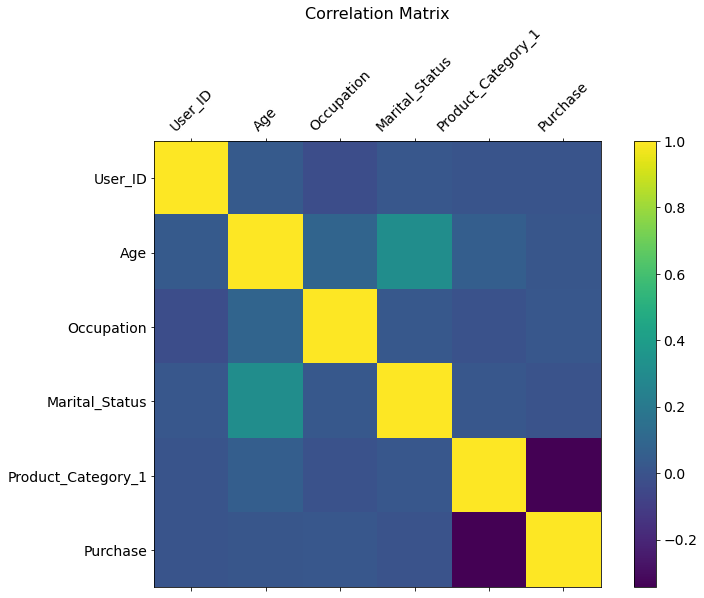

In [23]:
f = plt.figure(figsize=(12, 8))
plt.matshow(train_data.corr(), fignum=f.number)
plt.xticks(range(train_data.select_dtypes(['number']).shape[1]), train_data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(train_data.select_dtypes(['number']).shape[1]), train_data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

<AxesSubplot:>

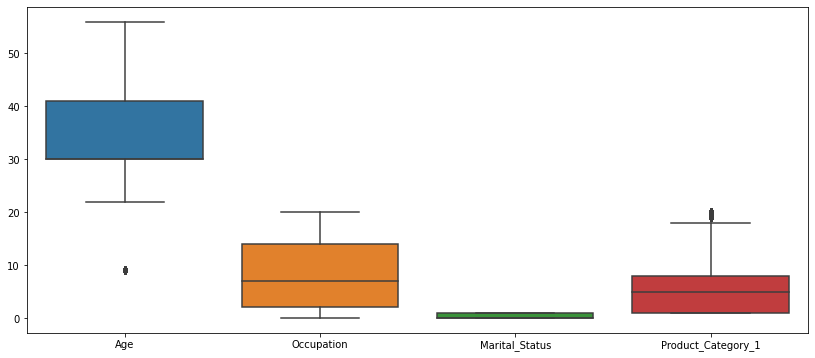

In [24]:
plt.figure(figsize=(14, 6))
x = train_data[['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1']]
sns.boxplot(data=x)

<AxesSubplot:xlabel='Age'>

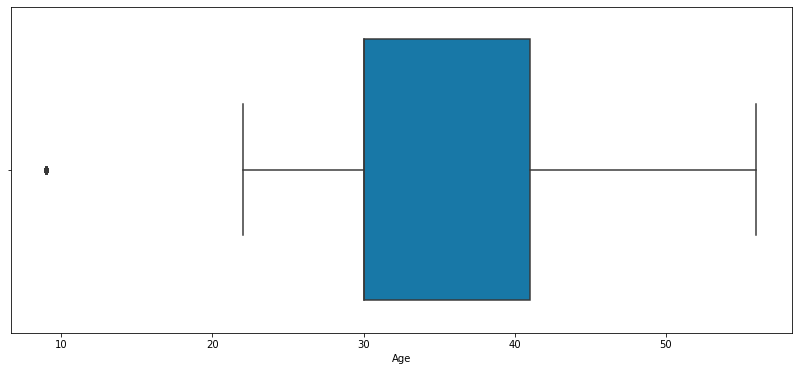

In [25]:
plt.figure(figsize=(14, 6))
sns.boxplot(x="Age",data=train_data,palette='winter')

<AxesSubplot:xlabel='Product_Category_1'>

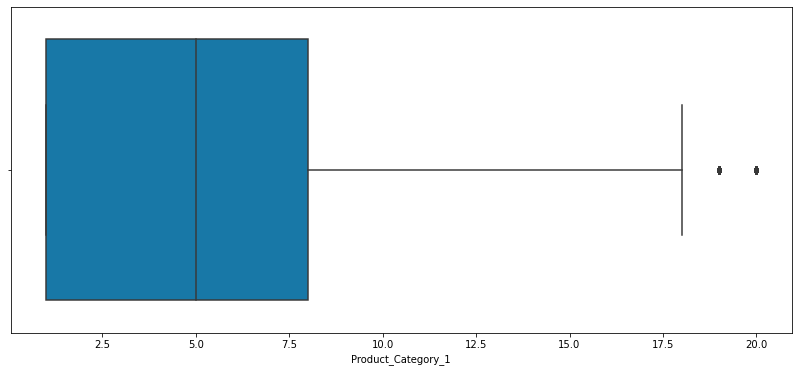

In [26]:
plt.figure(figsize=(14, 6))
sns.boxplot(x="Product_Category_1",data=train_data,palette='winter')

<AxesSubplot:xlabel='Purchase'>

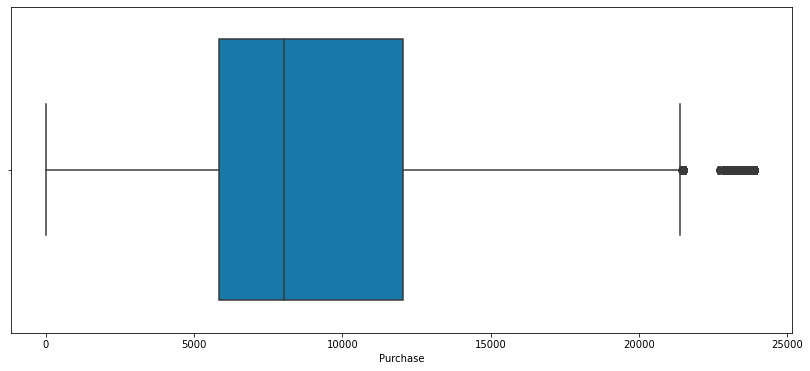

In [27]:
plt.figure(figsize=(14, 6))
sns.boxplot(x="Purchase",data=train_data,palette='winter')

<AxesSubplot:xlabel='Gender', ylabel='Count'>

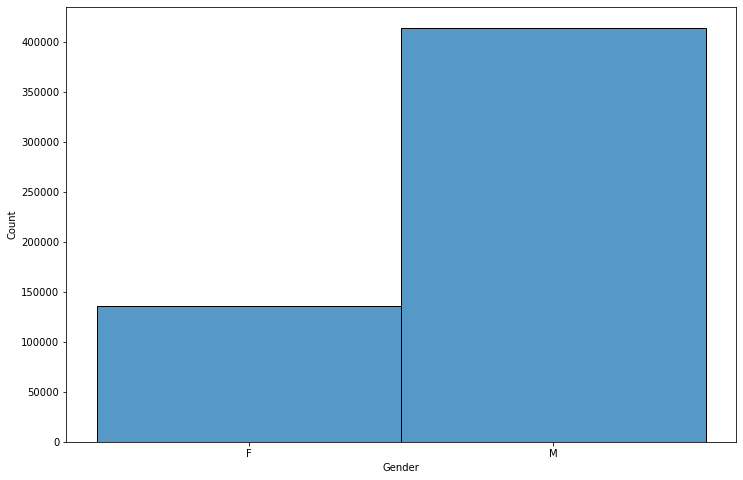

In [28]:
plt.figure(figsize=(12, 8))
sns.histplot(data=train_data.Gender)

<AxesSubplot:xlabel='Gender', ylabel='Count'>

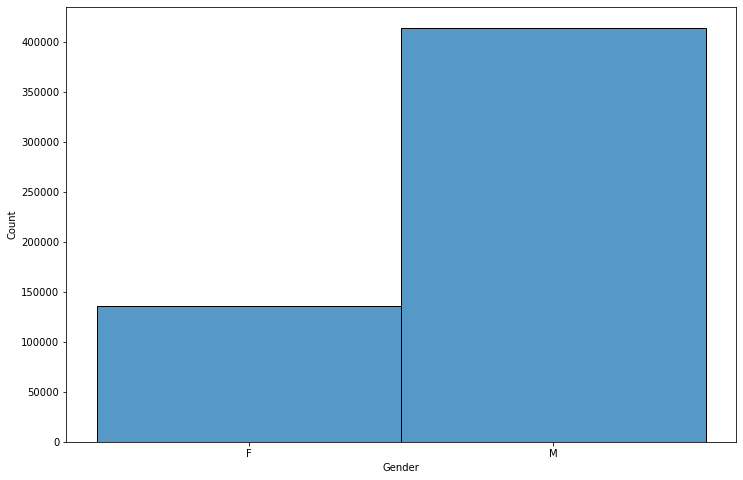

In [29]:
plt.figure(figsize=(12, 8))
sns.histplot(data=train_data.Gender)

# Detacting Outlires Using Z-score
  ### Formula of Z-Score is 
  ### Z-Score=(Obzervation - Mean)/Standard deviation
  ### Z-Score = (X - μ) / σ

### Outlires Remove - Purchase

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

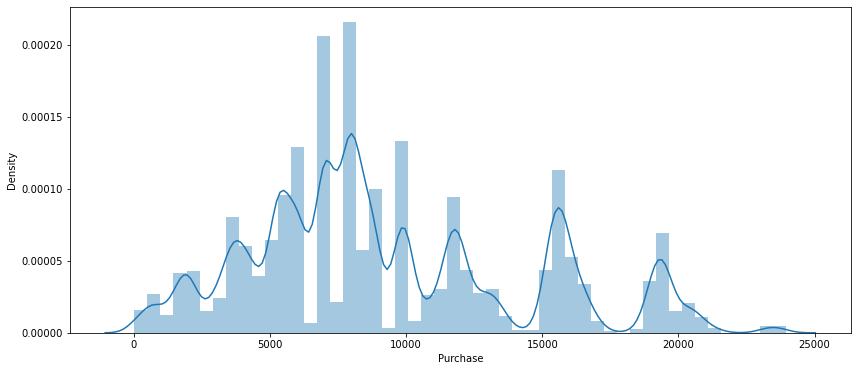

In [30]:
plt.figure(figsize=(14, 6))
sns.distplot(train_data['Purchase'])

In [31]:
upper_limit = train_data['Purchase'].quantile(0.99)
lower_limit = train_data['Purchase'].quantile(0.01)

In [32]:
new_df = train_data[(train_data['Purchase'] <= 74.78) & (train_data['Purchase'] >= 58.13)]

In [33]:
train_data['Purchase'] = np.where(train_data['Purchase'] >= upper_limit,
        upper_limit,
        np.where(train_data['Purchase'] <= lower_limit,
        lower_limit,
        train_data['Purchase']))

<AxesSubplot:xlabel='Purchase'>

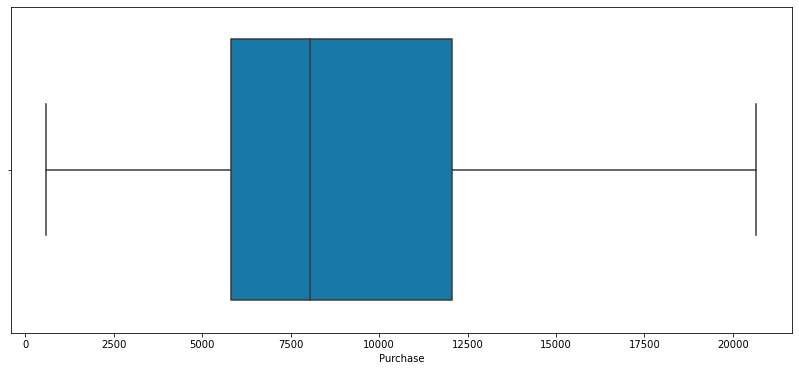

In [34]:
plt.figure(figsize=(14, 6))
sns.boxplot(x="Purchase",data=train_data,palette='winter')

## 1. Label Encoding - Train data

In [35]:
# Appling Lebel Encoder to all Columns
label_encoder = preprocessing.LabelEncoder()
objList = train_data.select_dtypes(include = "object").columns
#print (objList)
le = LabelEncoder()

for feat in objList:
    train_data[feat] = le.fit_transform(train_data[feat].astype(str))

print (train_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  int32  
 2   Gender                      550068 non-null  int32  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int32  
 6   Stay_In_Current_City_Years  550068 non-null  int32  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Purchase                    550068 non-null  float64
dtypes: float64(1), int32(4), int64(5)
memory usage: 37.8 MB
None


## 2. Label Encoding - Test data

In [36]:
# Appling Lebel Encoder to all Columns
label_encoder = preprocessing.LabelEncoder()
objList = test_data.select_dtypes(include = "object").columns
#print (objList)
le = LabelEncoder()

for feat in objList:
    test_data[feat] = le.fit_transform(test_data[feat].astype(str))

print (test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   User_ID                     233599 non-null  int64
 1   Product_ID                  233599 non-null  int32
 2   Gender                      233599 non-null  int32
 3   Age                         233599 non-null  int32
 4   Occupation                  233599 non-null  int64
 5   City_Category               233599 non-null  int32
 6   Stay_In_Current_City_Years  233599 non-null  int32
 7   Marital_Status              233599 non-null  int64
 8   Product_Category_1          233599 non-null  int64
dtypes: int32(5), int64(4)
memory usage: 11.6 MB
None


In [37]:
train_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,672,0,9,10,0,2,0,3,8370.0
1,1000001,2376,0,9,10,0,2,0,1,15200.0
2,1000001,852,0,9,10,0,2,0,12,1422.0
3,1000001,828,0,9,10,0,2,0,12,1057.0
4,1000002,2734,1,56,16,2,4,0,8,7969.0
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,3567,1,52,13,1,1,1,20,587.0
550064,1006035,3568,0,30,1,2,3,0,20,587.0
550065,1006036,3568,0,30,15,1,4,1,20,587.0
550066,1006038,3568,0,56,1,2,2,0,20,587.0


## Split out Dataset

In [38]:
X=train_data.drop(columns=['Purchase'])
Y=train_data['Purchase']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

## Standarize Data

In [39]:
x_train.std()

User_ID                       1726.612048
Product_ID                    1012.422431
Gender                           0.431163
Age                             10.826534
Occupation                       6.525488
City_Category                    0.760547
Stay_In_Current_City_Years       1.289885
Marital_Status                   0.491605
Product_Category_1               3.936895
dtype: float64

In [40]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
print(x_train_std.std())

0.9999999999999999


In [41]:
x_train=x_train_std

In [42]:
x_test.std()

User_ID                       1729.879285
Product_ID                    1011.687375
Gender                           0.431306
Age                             10.834951
Occupation                       6.516078
City_Category                    0.759424
Stay_In_Current_City_Years       1.288402
Marital_Status                   0.492150
Product_Category_1               3.934625
dtype: float64

In [43]:
x_test_std = scaler.transform(x_test)
print(x_test_std.std())

0.9998635020220793


In [44]:
x_test=x_test_std

## Evaluate Algorithm

In [45]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RR', Ridge()))
models.append(('RR', GradientBoostingRegressor()))
models.append(('RR', ExtraTreesRegressor()))
models.append(('RR', AdaBoostRegressor()))
models.append(('RFR', RandomForestRegressor()))

#models.append(('SVR', SVR()))
# '''

In [46]:
results = []
names = []
for name, model in models:
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print ("                                                   ")
    print ("```````````````````````````````````````````````````")
    print ("Algorithnm :",model)
    print ("```````````````````````````````````````````````````")
    print ('R Squared =',r2_score(y_test, pred))
    print ('MAE       =',mean_absolute_error(y_test, pred))
    print ('MSE       =',mean_squared_error(y_test, pred))
    print ('RMSE      =',sqrt(mean_squared_error(y_test, pred)))

                                                   
```````````````````````````````````````````````````
Algorithnm : LinearRegression()
```````````````````````````````````````````````````
R Squared = 0.1362337002181374
MAE       = 3563.3827152341455
MSE       = 21385959.82452055
RMSE      = 4624.495629203314
                                                   
```````````````````````````````````````````````````
Algorithnm : Lasso()
```````````````````````````````````````````````````
R Squared = 0.13623462799062125
MAE       = 3563.4818625386874
MSE       = 21385936.85383384
RMSE      = 4624.493145614321
                                                   
```````````````````````````````````````````````````
Algorithnm : ElasticNet()
```````````````````````````````````````````````````
R Squared = 0.12132093487527462
MAE       = 3687.2871025884756
MSE       = 21755184.463841986
RMSE      = 4664.245326292559
                                                   
````````````````````````````````

In [48]:
rf = RandomForestRegressor(n_estimators=160, random_state = True)
#rf = AdaBoostRegressor()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
print ('RMSE      =', sqrt(mean_squared_error(y_test, rf_pred)))

RMSE      = 2730.540344248385


## Saving the Model

In [49]:
import pickle
with open("Trained_Model.pickle", "wb") as file:
    pickle.dump(rf, file)

## Prediction

In [73]:
# Upload File Here
raw_input = pd.read_csv("test.csv")
raw_input = raw_input.drop(columns="Product_Category_2")
raw_input = raw_input.drop(columns="Product_Category_3")
# Label "Age" Column
raw_input.replace(to_replace=['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'], value = [9, 56 , 30, 48, 52, 41, 22], inplace = True)
raw_input  

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1
0,1000004,P00128942,M,48,7,B,2,1,1
1,1000009,P00113442,M,30,17,C,0,0,3
2,1000010,P00288442,F,41,1,B,4+,1,5
3,1000010,P00145342,F,41,1,B,4+,1,4
4,1000011,P00053842,F,30,1,C,1,0,4
...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,30,15,B,4+,1,8
233595,1006036,P00254642,F,30,15,B,4+,1,5
233596,1006036,P00031842,F,30,15,B,4+,1,1
233597,1006037,P00124742,F,48,1,C,4+,0,10


In [74]:
#Label Encoding
label_encoder = preprocessing.LabelEncoder()
objList = raw_input.select_dtypes(include = "object").columns
#print (objList)
le = LabelEncoder()

for feat in objList:
    raw_input[feat] = le.fit_transform(raw_input[feat].astype(str))

#print (x.info())
# Standarize
raw_input_std = scaler.transform(raw_input)
raw_input = raw_input_std
raw_input

array([[-1.75151946, -0.55678396,  0.57245705, ...,  0.10830622,
         1.20267865, -1.11911584],
       [-1.74862361, -0.70494365,  0.57245705, ..., -1.44222123,
        -0.8314773 , -0.61110066],
       [-1.74804444,  0.95246942, -1.74685595, ...,  1.65883368,
         1.20267865, -0.10308547],
       ...,
       [ 1.74203188, -1.38746597, -1.74685595, ...,  1.65883368,
         1.20267865, -1.11911584],
       [ 1.74261105, -0.59530548, -1.74685595, ...,  1.65883368,
        -0.8314773 ,  1.1669525 ],
       [ 1.74376939,  1.19841451, -1.74685595, ...,  1.65883368,
         1.20267865, -0.35709306]])

In [75]:
predictions = rf.predict(raw_input)
predictions

array([ 8038.06875, 10612.39375,  4957.84375, ..., 11949.825  ,
       20051.11875,  2382.675  ])

In [69]:
submission = pd.read_csv("test.csv")

In [76]:
submission.shape

(233599, 12)

In [77]:
predictions.shape

(233599,)

## Creating a new DataFrame for Submission

In [81]:
data = {'Purchase':[],
        'User_ID':[],
        'Product_ID':[]}
df = pd.DataFrame(data)


,Purchase,User_ID,Product_ID


In [83]:
df["Purchase"] = predictions
df["User_ID"] = submission["User_ID"]
df["Product_ID"] = submission["Product_ID"]
df

,Purchase,User_ID,Product_ID
0,8038.06875,1000004,P00128942
1,10612.39375,1000009,P00113442
2,4957.84375,1000010,P00288442
3,2018.08750,1000010,P00145342
4,2314.85625,1000011,P00053842
...,...,...,...
233594,7269.09375,1006036,P00118942
233595,6249.21250,1006036,P00254642
233596,11949.82500,1006036,P00031842
233597,20051.11875,1006037,P00124742


## Save to csv Format

In [84]:
df.to_csv("Final_output.csv", index=False)
print(df)

           Purchase  User_ID Product_ID
0        8038.06875  1000004  P00128942
1       10612.39375  1000009  P00113442
2        4957.84375  1000010  P00288442
3        2018.08750  1000010  P00145342
4        2314.85625  1000011  P00053842
...             ...      ...        ...
233594   7269.09375  1006036  P00118942
233595   6249.21250  1006036  P00254642
233596  11949.82500  1006036  P00031842
233597  20051.11875  1006037  P00124742
233598   2382.67500  1006039  P00316642

[233599 rows x 3 columns]
